In [1]:
import torch
import torchvision.datasets as datasets
from torchmetrics.image.fid import FrechetInceptionDistance
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import FID_util
import numpy as np
%matplotlib inline

# Set seed here
seed = 123459
torch.manual_seed(seed)

plot_path = "./plots/FID_real_image/"

## Data Sets

In [2]:
# MNIST
MNIST_train_loader = FID_util.DataLoader(datasets.MNIST('./data', train=True, download=True,
                             transform=transforms.Compose([
                               transforms.PILToTensor()])), batch_size=10000, shuffle=True);

MNIST_test_loader =  FID_util.DataLoader(datasets.MNIST('./data', train=False, download=True,
                             transform=transforms.Compose([
                               transforms.PILToTensor()])), batch_size=10000, shuffle=True);
MNIST_train, MNIST_test = FID_util.load_data(MNIST_train_loader, MNIST_test_loader, 10000, (28, 28))

# Base FID
print(f"Base FID MNIST: {FID_util.compute_FID(MNIST_train, MNIST_test).item()}")

Base FID MNIST: 1.5220389366149902


In [3]:
# CIFAR 100
CIFAR_train_loader = FID_util.DataLoader(datasets.CIFAR100('./data', train=True, download=True,
                             transform=transforms.Compose([
                               transforms.PILToTensor()])), batch_size=10000, shuffle=True);

CIFAR_test_loader =  FID_util.DataLoader(datasets.CIFAR100('./data', train=False, download=True,
                             transform=transforms.Compose([
                               transforms.PILToTensor()])), batch_size=10000, shuffle=True);
CIFAR_train, CIFAR_test = FID_util.load_data(CIFAR_train_loader, CIFAR_test_loader, 10000, (32, 32))

# Base FID
print(f"Base FID CIFAR: {FID_util.compute_FID(CIFAR_train, CIFAR_test).item()}")

Files already downloaded and verified
Files already downloaded and verified
Base FID CIFAR: 5.892246723175049


In [4]:
# CelebA
CelebA_train_loader = DataLoader(datasets.CelebA('./data', split="train", download=True,
                             transform=transforms.Compose([
                               transforms.PILToTensor()])), batch_size=10000, shuffle=True);

CelebA_test_loader =  DataLoader(datasets.CelebA('./data', split="test", download=True,
                             transform=transforms.Compose([
                               transforms.PILToTensor()])), batch_size=10000, shuffle=True);
CelebA_train, CelebA_test = FID_util.load_data(CelebA_train_loader, CelebA_test_loader, 10000, (218, 178))

# Base FID
print(f"Base FID CelebA: {FID_util.compute_FID(CelebA_train, CelebA_test, batch_num=125).item()}")

Files already downloaded and verified
Files already downloaded and verified
Base FID CelebA: 3.541612386703491


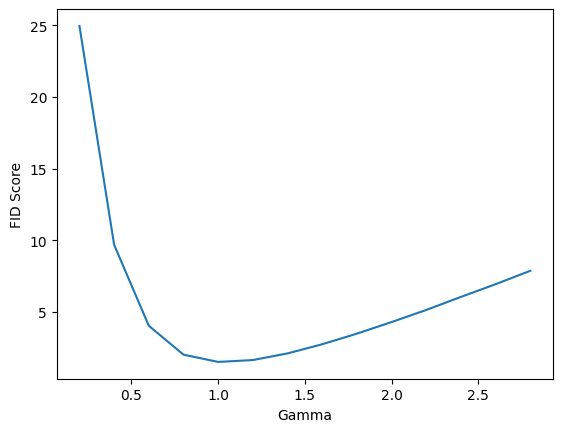

In [5]:
gamma_array = np.arange(0.2, 3.0, 0.2)
FID_util.plot_FID(gamma_array, transforms.functional.adjust_gamma, "Gamma", MNIST_train, MNIST_test)
plt.savefig(plot_path + "MNIST_gamma_fid_scores")

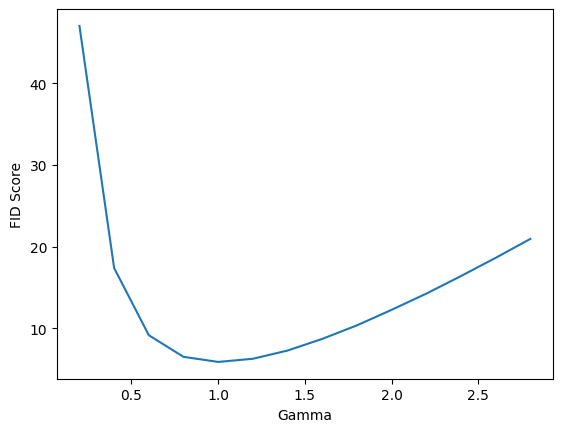

In [6]:
FID_util.plot_FID(gamma_array, transforms.functional.adjust_gamma, "Gamma", CIFAR_train, CIFAR_test)
plt.savefig(plot_path+ "CIFAR_gamma_fid_scores")

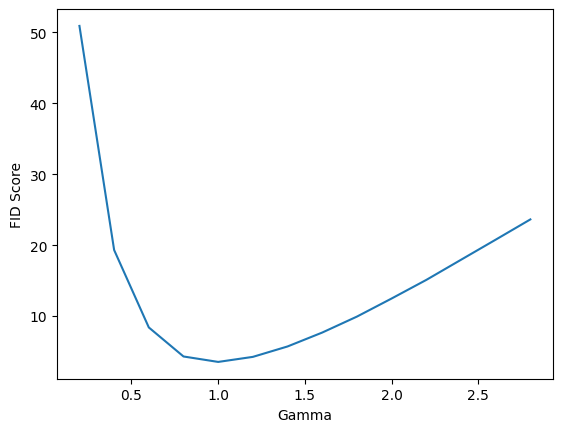

In [7]:
FID_util.plot_FID(gamma_array, transforms.functional.adjust_gamma, "Gamma", CelebA_train, CelebA_test, batch_num=125)
plt.savefig(plot_path+ "CelebA_gamma_fid_scores")

## Gaussian Blur

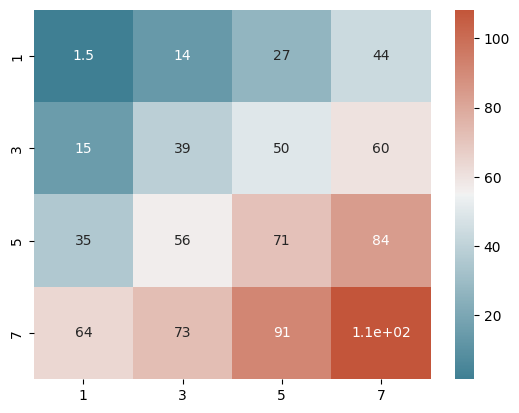

In [8]:
FID_util.generate_heatmap(MNIST_train, MNIST_test, plot_path + "MNIST_blurring_fid")

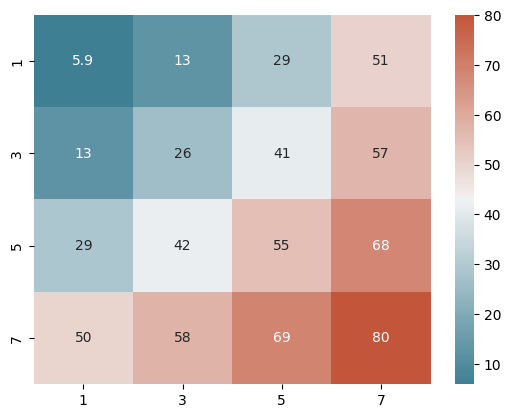

In [9]:
FID_util.generate_heatmap(CIFAR_train, CIFAR_test, plot_path + "CIFAR_blurring_fid")

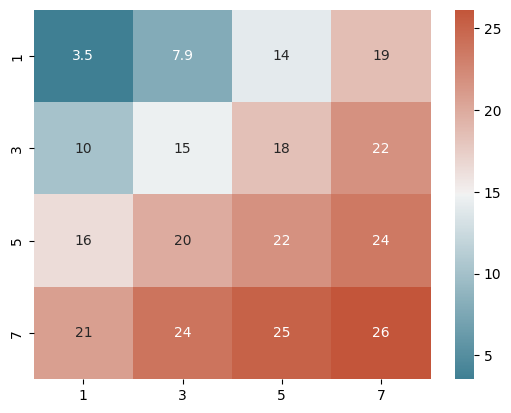

In [10]:
FID_util.generate_heatmap(CelebA_train, CelebA_test, plot_path + "CelebA_blurring_fid", batch_num=125)

## Salt and Pepper Noise

/home/shaoqingf/FID_research/FID_util.py:109: FutureWarning: `seed` is a deprecated argument name for `random_noise`. It will be removed in version 0.23. Please use `rng` instead.
  noised_test = torch.tensor(random_noise(noised_test, mode="s&p", seed=seed, amount=amount))


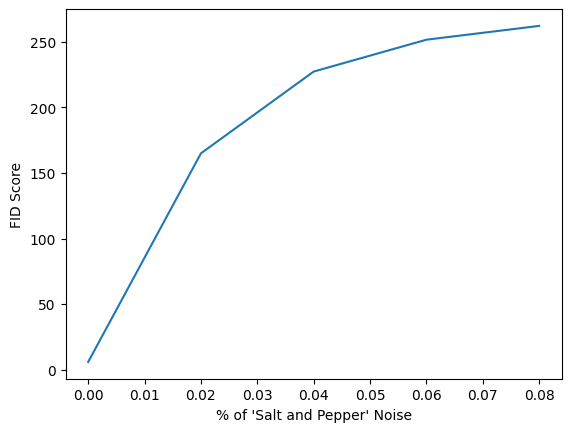

In [11]:
percentages = np.arange(0, 0.1, 0.02)
noise_FID_results = [FID_util.noisify_FID(p, CIFAR_train, CIFAR_test) for p in percentages]
plt.plot(percentages, noise_FID_results)
plt.xlabel("% of 'Salt and Pepper' Noise")
plt.ylabel("FID Score")
plt.savefig(plot_path + "CIFAR_Noise_fid_scores")

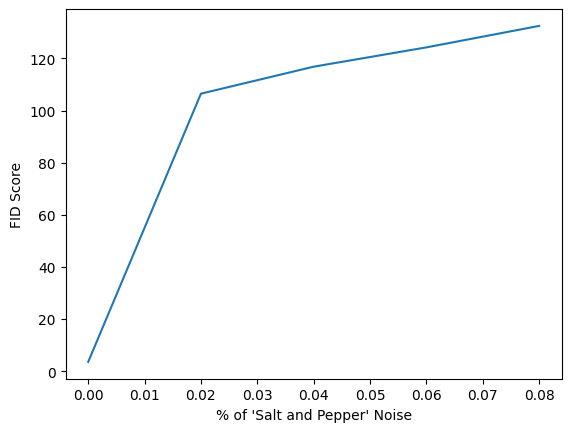

In [12]:
noise_FID_results = [FID_util.noisify_FID(p, CelebA_train, CelebA_test, batch_num=125) for p in percentages]
plt.plot(percentages, noise_FID_results)
plt.xlabel("% of 'Salt and Pepper' Noise")
plt.ylabel("FID Score")
plt.savefig(plot_path + "CelebA_Noise_fid_scores")